In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyBigWig
from pyBioInfo.IO.File import BedFile

# Tracks of eCLIP-seq at XIST (Figure 2g and Extended Data Figure 3c)

In [4]:
with BedFile("/home/zgchen/species/homo_sapiens/GRCh38.p13/gencode.v39.transcripts.bed.gz") as f:
    transcripts = {t.name: t for t in f}

In [14]:
data = {
    "BUD13": "data/ENCODE/eCLIPseq/BUD13/eCLIP_K562_BUD13_minus_ENCFF659LQY.bigWig",
    "DDX42": "data/ENCODE/eCLIPseq/DDX42/eCLIP_K562_DDX42_minus_ENCFF193HOO.bigWig",
    "DDX52": "data/ENCODE/eCLIPseq/DDX52/eCLIP_K562_DDX52_minus_ENCFF586YIZ.bigWig",
    "DDX55": "data/ENCODE/eCLIPseq/DDX55/eCLIP_K562_DDX55_minus_ENCFF022MZM.bigWig",
    "GPKOW": "data/ENCODE/eCLIPseq/GPKOW/eCLIP_K562_GPKOW_minus_ENCFF809WWV.bigWig",
    "PCBP1": "data/ENCODE/eCLIPseq/PCBP1/eCLIP_K562_PCBP1_minus_ENCFF734ILS.bigWig",
    "UTP3": "data/ENCODE/eCLIPseq/UTP3/eCLIP_K562_UTP3_minus_ENCFF247UQF.bigWig",
    "ZC3H8": "data/ENCODE/eCLIPseq/ZC3H8/eCLIP_K562_ZC3H8_minus_ENCFF607HRG.bigWig",
    "ZRANB2": "data/ENCODE/eCLIPseq/ZRANB2/eCLIP_K562_ZRANB2_minus_ENCFF958SCV.bigWig"
}

data_ylim = {
    "BUD13": 5,
    "DDX42": 10,
    "DDX52": 5,
    "DDX55": 5,
    "GPKOW": 5,
    "PCBP1": 10,
    "UTP3": 5,
    "ZC3H8": 5,
    "ZRANB2": 5
}

In [15]:
chrom, start, end = "chrX", 73816000, 73855000
tids = [
    "ENST00000429829.6", # XIST
    "ENST00000604411.1" # TSIX
]

## Figure 2g

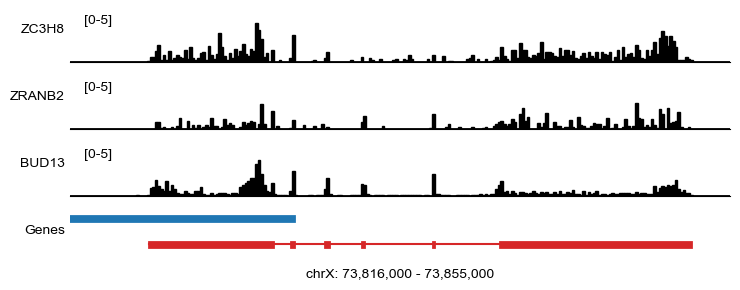

In [19]:
genes = ["ZC3H8", "ZRANB2", "BUD13"]

fig, axs = plt.subplots(len(genes) + 1, 1, figsize=(7.5, 3))

if True:
    for i, gene in enumerate(genes):
        path = data[gene]
        plt.sca(axs[i])
        plt.xlim(start, end)
        plt.xticks([])
        plt.ylabel(gene, rotation=0, ha="right")
        ylim = data_ylim[gene]
        plt.ylim(0, ylim)
        plt.yticks([])
        plt.text(start + (end - start) * 0.02, ylim * 0.9, "[%d-%d]" % (0, ylim), ha="left", va="top")
        plt.plot([start, end], [0, 0], color="black", lw=2)
        plt.gca().spines["bottom"].set_visible(True)
        plt.gca().spines["top"].set_visible(False)
        plt.gca().spines["left"].set_visible(False)
        plt.gca().spines["right"].set_visible(False)
        if True:
            with pyBigWig.open(path) as bw:
                w = int((end - start) / 250) # nbin
                ys = np.nan_to_num(bw.values(chrom, start, end), 0) * -1
                ys = ys.reshape((-1, w)).mean(axis=1)
                xs = np.arange(start, end, w) + w/2
                color = "black"
                plt.bar(xs, ys, width=w, color=color, edgecolor=color)

if True:
    plt.sca(axs[-1])
    plt.xlim(start, end)
    plt.xticks([])
    plt.xlabel("%s: %s - %s" % (chrom, format(start, ","), format(end, ",")))
    plt.ylim(0, len(tids))
    plt.yticks([])
    plt.ylabel("Genes", rotation=0, ha="right")
    plt.gca().spines["bottom"].set_visible(False)
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["left"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    for i, tid in enumerate(tids):
        t = transcripts[tid]
        color = "C0" if t.strand == "+" else "C3"
        y_center = i + 0.7
        plt.plot([t.start, t.end], [y_center, y_center], color=color)
        y_text = i + 0.15
        for block in t.blocks:
            h = 0.2
            plt.bar([np.mean(block)], [h], bottom=[y_center-h/2], width=block[1]-block[0], lw=2, edgecolor=color, color=color)
plt.tight_layout()
plt.savefig("figures/tracks_of_chip_seq_at_xist.pdf")
plt.show()
plt.close()

## Extended Data Figure 3c

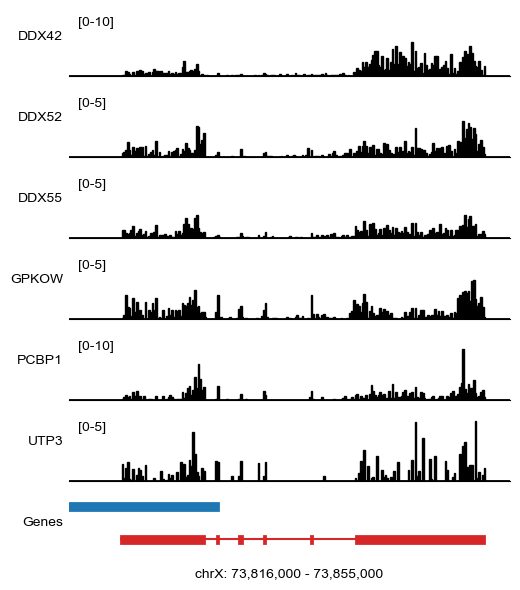

In [20]:
genes = ["DDX42", "DDX52", "DDX55", "GPKOW", "PCBP1", "UTP3"]
fig, axs = plt.subplots(len(genes) + 1, 1, figsize=(5.3, 6))

if True:
    for i, gene in enumerate(genes):
        path = data[gene]
        plt.sca(axs[i])
        plt.xlim(start, end)
        plt.xticks([])
        plt.ylabel(gene, rotation=0, ha="right")
        ylim = data_ylim[gene]
        plt.ylim(0, ylim)
        plt.yticks([])
        plt.text(start + (end - start) * 0.02, ylim * 0.9, "[%d-%d]" % (0, ylim), ha="left", va="top")
        plt.plot([start, end], [0, 0], color="black", lw=2)
        plt.gca().spines["bottom"].set_visible(True)
        plt.gca().spines["top"].set_visible(False)
        plt.gca().spines["left"].set_visible(False)
        plt.gca().spines["right"].set_visible(False)
        if True:
            with pyBigWig.open(path) as bw:
                w = int((end - start) / 250) # nbin
                ys = np.nan_to_num(bw.values(chrom, start, end), 0) * -1
                ys = ys.reshape((-1, w)).mean(axis=1)
                xs = np.arange(start, end, w) + w/2
                color = "black"
                plt.bar(xs, ys, width=w, color=color, edgecolor=color)

if True:
    plt.sca(axs[-1])
    plt.xlim(start, end)
    plt.xticks([])
    plt.xlabel("%s: %s - %s" % (chrom, format(start, ","), format(end, ",")))
    plt.ylim(0, len(tids))
    plt.yticks([])
    plt.ylabel("Genes", rotation=0, ha="right")
    plt.gca().spines["bottom"].set_visible(False)
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["left"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    for i, tid in enumerate(tids):
        t = transcripts[tid]
        color = "C0" if t.strand == "+" else "C3"
        y_center = i + 0.7
        plt.plot([t.start, t.end], [y_center, y_center], color=color)
        y_text = i + 0.15
        for block in t.blocks:
            h = 0.2
            plt.bar([np.mean(block)], [h], bottom=[y_center-h/2], width=block[1]-block[0], lw=2, edgecolor=color, color=color)
plt.tight_layout()
plt.savefig("figures/tracks_of_chip_seq_at_xist.sup.pdf")
plt.show()
plt.close()